λ_min = 150.01133187849334
λ_max = 720.7240953082478
τ_opt_time = 0.0012333275585974662
τ_opt_iters = 0.002158323227545566
t_opt = 0.002296908954838095


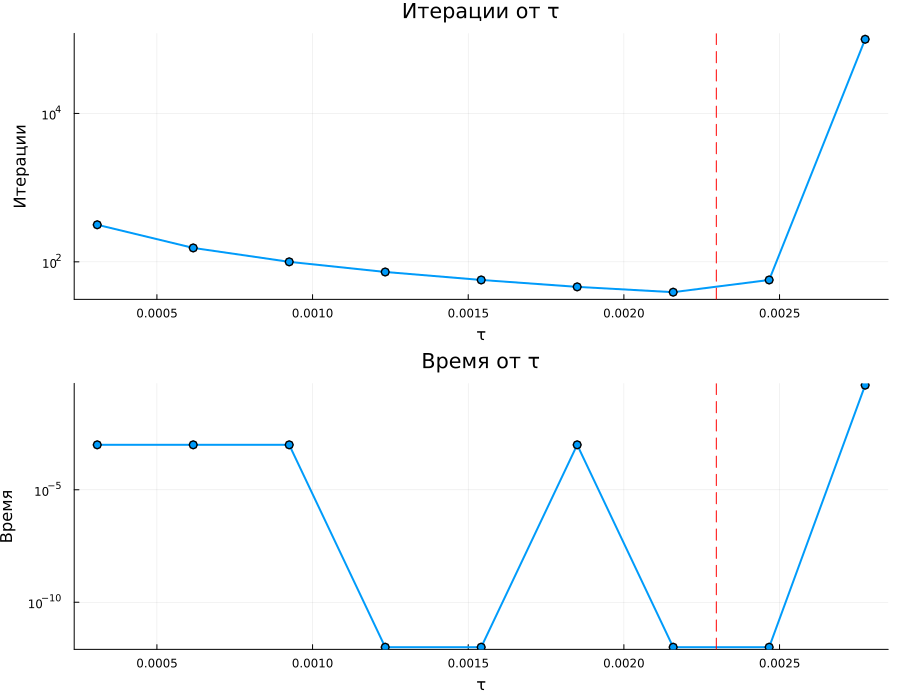

In [25]:
using LinearAlgebra
using Random
using Plots

function solver(A, f, τ; ε=1e-6, max_iter=10_000)
    n = length(f)
    P = I - τ * A
    g = τ * f
    x = zeros(n)
    res = norm(f - A*x)
    k = 0
    t_start = time()
    while res > ε && k < max_iter
        x = P * x + g
        res = norm(f - A*x)
        k += 1
    end
    t_end = time()
    return k, t_end - t_start
end

function make_iter(A, f; ε=1e-6, max_iter=10_000, τ_grid=nothing)
    iters = Float64[]
    times = Float64[]
    for τ in τ_grid
        k, t = solver(A, f, τ; ε=ε, max_iter=max_iter)
        push!(iters, k)
        push!(times, t)
    end
    return iters, times
end

function plots(τ_values, iters, times, τ_opt)
    ϵ = 1e-12
    it_min, it_max = minimum(iters), maximum(iters)
    tm_shift = times .+ ϵ
    tm_min, tm_max = minimum(tm_shift), maximum(tm_shift)

    plt1 = plot(τ_values, iters, marker=:o, lw=2, xlabel="τ", ylabel="Итерации",
                title="Итерации от τ", legend=false, yscale=:log10,
                ylim=(it_min*0.8, it_max*1.2))
    vline!(plt1, [τ_opt], color=:red, ls=:dash, label="τ_opt")

    plt2 = plot(τ_values, tm_shift, marker=:o, lw=2, xlabel="τ", ylabel="Время",
                title="Время от τ", legend=false, yscale=:log10,
                ylim=(tm_min*0.8, tm_max*1.2))
    vline!(plt2, [τ_opt], color=:red, ls=:dash, label="τ_opt")

    display(plot(plt1, plt2, layout=(2,1), size=(900,700)))
end

function main(; n=150, ε=1e-6, max_iter=100_000, seed=42)
    Random.seed!(seed)
    B = randn(n, n)
    A = Symmetric(B' * B + n * I)
    f = randn(n)
    λ = eigvals(A)
    λ_min, λ_max = minimum(λ), maximum(λ)
    τ_values = collect(range(0, stop=2/λ_max, length=10)[2:end])
    τ_opt = 2 / (λ_min + λ_max)
    iters, times = make_iter(A, f; ε=ε, max_iter=max_iter, τ_grid=τ_values)
    _, idx_t = findmin(times)
    _, idx_i = findmin(iters)
    τ_opt_time = τ_values[idx_t]
    τ_opt_iters = τ_values[idx_i]
    println("λ_min = $λ_min")
    println("λ_max = $λ_max")
    println("τ_opt_time = $τ_opt_time")
    println("τ_opt_iters = $τ_opt_iters")
    println("t_opt = $τ_opt")
    plots(τ_values, iters, times, τ_opt)
end

main()